## **PACE: Plan Stage**

**Who are your external stakeholders for this project?**

The external stakeholders include Waze leadership and the Operations Manager, Ursula Sayo, who will use the findings to guide retention strategies.

**What are you trying to solve or accomplish?**

We are trying to predict user churn (whether a user is retained or churned) by building a binomial logistic regression model. The goal is to use insights from the model to help Waze improve user retention.

**What are your initial observations when you explore the data?**

The dataset has 14,999 entries and 13 variables.

The target variable label has missing values (700 rows), and the classes are imbalanced (~82% retained, ~18% churned).

Several numerical features have potential outliers.

**What resources do you find yourself using as you complete this stage?**

Coursera labs and templates

Python documentation

Stack Overflow for technical troubleshooting

Scikit-learn, pandas, seaborn for implementation

**Task 1. Imports and data loading**

Import the data and packages that you've learned are needed for building logistic regression model

In [3]:
# Import any relevant packages or libraries
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

Import the dataset.

In [5]:
# Load the dataset
df = pd.read_csv(r'D:\5B. Google_Advanced_data_analysis\training_project_data\waze_dataset.csv')

## **PACE: Analyze Stage**

**What are some purposes of EDA before constructing a binomial logistic regression model?**

EDA allows us to:

    Detect and handle missing values
    
    Identify outliers and assess variable distributions
    
    Check correlations and multicollinearity
    
    Engineer new features like km_per_driving_day and professional_driver

**Do you have any ethical considerations in this stage?**

Yes, ethical considerations include preserving user privacy, avoiding biases in the model, and ensuring transparency in how predictions are used.

**Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

In [8]:
# Correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = df.select_dtypes(include='number').corr()
print(correlation_matrix)


Correlation matrix:
                               ID  sessions    drives  total_sessions  \
ID                       1.000000  0.011240  0.010470        0.002909   
sessions                 0.011240  1.000000  0.996822        0.589079   
drives                   0.010470  0.996822  1.000000        0.586741   
total_sessions           0.002909  0.589079  0.586741        1.000000   
n_days_after_onboarding -0.005673  0.005676  0.005216        0.004731   
total_navigations_fav1  -0.000606  0.005713  0.005017        0.002137   
total_navigations_fav2  -0.000771  0.006185  0.007572        0.006421   
driven_km_drives        -0.003561  0.002113  0.001883       -0.000416   
duration_minutes_drives -0.001594 -0.006113 -0.005855       -0.001689   
activity_days           -0.001887  0.024194  0.024043        0.013449   
driving_days            -0.001808  0.018973  0.018847        0.009912   

                         n_days_after_onboarding  total_navigations_fav1  \
ID                        

In [9]:
#Finding items with missing values if any
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [10]:
# Summary statistics for numeric data
print("\nNumeric Summary:\n")
df.describe()


Numeric Summary:



,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [11]:
# Finding duplicated rows
print("\nDuplicated rows:")

duplicates = df[df.duplicated()]

if not duplicates.empty:
    print(duplicates)
else:
    print("There are no duplicated rows.")


Duplicated rows:
There are no duplicated rows.


**Question:** Are there any missing values in your data?

Yes, 700 values are missing within the `label` attribute.

Use `head()`

In [14]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use the `drop()` method to remove the ID column since you don't need this information for your analysis.

In [16]:
df = df.drop('ID', axis=1)

Now, check the class balance of the dependent (target) variable, `label`.

In [18]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Call `describe()` on the data.

In [20]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The following columns all seem to have outliers:

`sessions`

`drives`

`total_sessions`

`total_navigations_fav1`

`total_navigations_fav2`

`driven_km_drives`

`duration_minutes_drives`

Data points beyond 1.5x the interquartile range are considered outliers. This could indicate outliers in these variables.

**Task 2b. Create features**
    
Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

**`km_per_driving_day`**
    
You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in df called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [23]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [25]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

**`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives **and** drove on 15+ days in the last month.

The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the `np.where()` function. This function accepts as arguments:

    1.A condition
    2.What to return when the condition is true
    3.What to return when the condition is false

In [27]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [29]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

**Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [34]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

**Impute outliers**
  
You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc**.

Previously, we determined that seven of the variables had clear signs of containing outliers:

`sessions`

`drives`

`total_sessions`

`total_navigations_fav1`

`total_navigations_fav2`

`driven_km_drives`

`duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.

In [36]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

Call `describe()`.

In [38]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


**Encode categorical variables**

Change the data type of the **column** to be binary. This change is needed to train a logistic regression model.

Assign a **0** for all **retained** users.

Assign a **1** for all **churned** users.

Save this variable as **label2** as to not overwrite the original **label** variable.

There are many ways to do this. Consider using **np.where()** as you did earlier in this notebook.

In [40]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()


,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


**Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

    Independent observations (This refers to how the data was collected.)
    
    No extreme outliers
    
    Little to no multicollinearity among X predictors
    
    Linear relationship between X and the logit of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling. 

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

**Collinearity**
  
Check the correlation among predictor variables. First, generate a correlation matrix.

In [43]:
# Generate a correlation matrix
df.select_dtypes(include='number').corr(method='pearson')


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

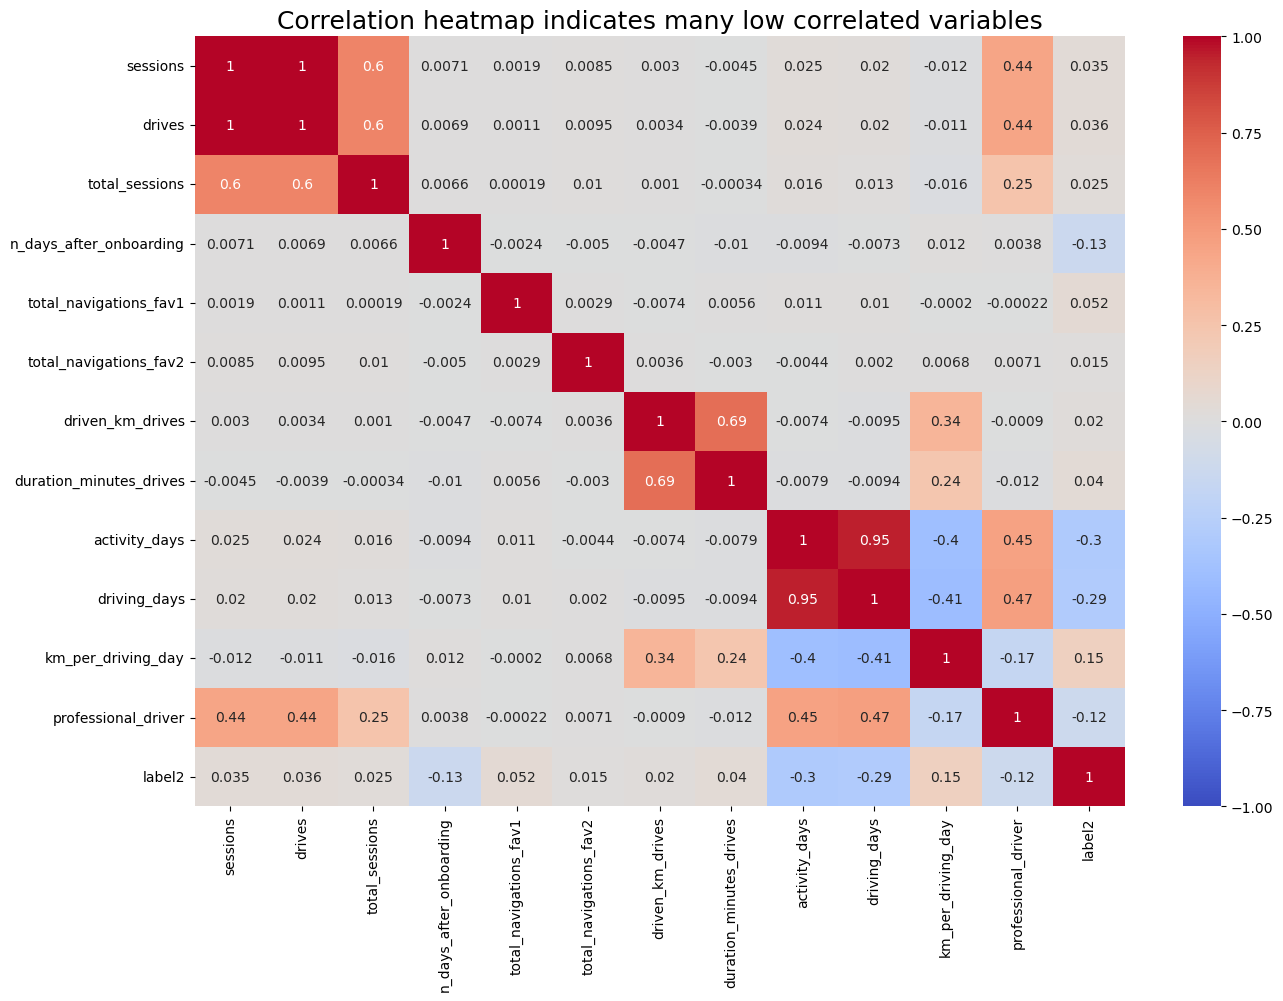

In [45]:
# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'),
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

    `sessions` and `drives` are multicollinear.
        
    `driving_days` and `activity_days` are multicollinear.

**Task 3c. Create dummies**
If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in `pd.get_dummies()`, or you can use scikit-learn's `OneHotEncoder()` function.

Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

    Android -> 0
    
    iPhone -> 1

In [48]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


**Task 3d. Model building**
    
**Assign predictor variables and target**
    
To build your model you need to determine what X variables you want to include in your model to predict your target—`label2`.

Drop the following variables and assign the results to X:

`label` (this is the target)

`label2` (this is the target)

`device` (this is the non-binary-encoded categorical variable)

`sessions` (this had high multicollinearity)

`driving_days` (this had high multicollinearity)

Notice that `sessions` and `driving_days` were selected to be dropped, rather than drives and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [50]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [52]:
# Isolate target variable
y = df['label2']

**Split the data**

Use scikit-learn's `train_test_split()` function to perform a train/test split on your data using the X and y variables you assigned above.

It is important to do a train test to obtain accurate predictions. You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [54]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [55]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Fit the model on `X_train` and `y_train`.

Call the `.coef_ attribute` on the model to get the coefficients of each variable. The coefficients are in order of how the variables are listed in the dataset. Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [58]:
model = LogisticRegression(penalty= None, solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty=None)

In [59]:
# Get coefficient of each variable
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001948
total_sessions             0.000368
n_days_after_onboarding   -0.000400
total_navigations_fav1     0.001258
total_navigations_fav2     0.001007
driven_km_drives          -0.000012
duration_minutes_drives    0.000110
activity_days             -0.105095
km_per_driving_day         0.000020
professional_driver       -0.010874
device2                    0.017326
dtype: float64

In [60]:
# Get intercept of the model
model.intercept_

array([-0.06548141])

**Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [62]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93713476, 0.06286524],
       [0.62348981, 0.37651019],
       [0.76575292, 0.23424708],
       ...,
       [0.91809453, 0.08190547],
       [0.84884583, 0.15115417],
       [0.93318295, 0.06681705]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where *p* is the probability of response:

$$\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right)$$

1.Create a dataframe called `logit_data` that is a copy of df.

2.Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.

In [66]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

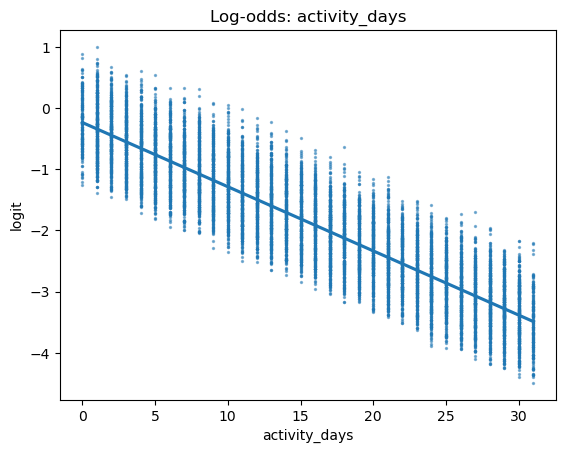

In [68]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

## **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.

In [70]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**. What is the accuracy of your model?

*Consider: Is accuracy the best metric to use to evaluate this model?*

In [72]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8243356643356643

## **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [74]:
cm = confusion_matrix(y_test, y_preds)

Next, use the `ConfusionMatrixDisplay()` function to display the `confusion_matrix` from the above cell, passing the confusion matrix you just created as its argument.

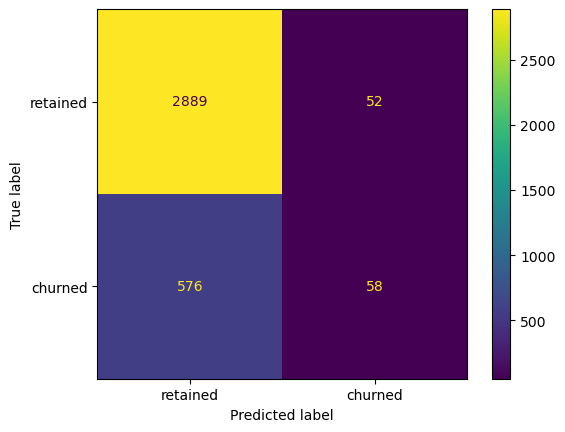

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'churned'],)
disp.plot();

You can use the `confusion_matrix` to compute precision and recall manually. You can also use scikit-learn's `classification_report()` function to generate a table from `y_test` and `y_preds`.

In [78]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5272727272727272

In [79]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0914826498422713

In [80]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.53      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

In [82]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('device2', 0.017326240320231754),
 ('drives', 0.0019477515350741865),
 ('total_navigations_fav1', 0.001258049757015686),
 ('total_navigations_fav2', 0.0010074463964563503),
 ('total_sessions', 0.000368278738165983),
 ('duration_minutes_drives', 0.00011025944702033624),
 ('km_per_driving_day', 1.9641371389815376e-05),
 ('driven_km_drives', -1.2429883450733288e-05),
 ('n_days_after_onboarding', -0.0003999353603531708),
 ('professional_driver', -0.010873862012567384),
 ('activity_days', -0.10509545950142297)]

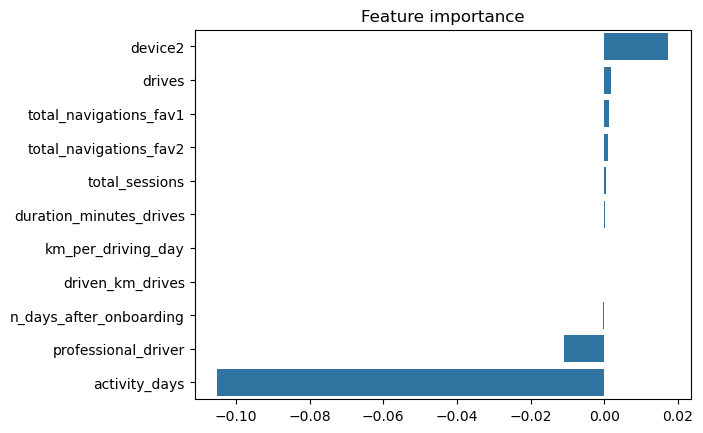

In [83]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

**Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

**1.What variable most influenced the model's prediction? How? Was this surprising?**

    `activity_days` was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with driving_days, which was known from EDA to have a negative correlation with churn.
    
**2.Were there any variables that you expected to be stronger predictors than they were?**

    Yes. In previous EDA, user churn rate increased as the values in `km_per_driving_day` increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable.
    
**3.Why might a variable you thought to be important not be important in the model?**

    In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.
    
**4.Would you recommend that Waze use this model? Why or why not?**

    It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.
    
**5.What could you do to improve this model?**

    New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, one of the engineered features (professional_driver) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.
    
**6.What additional features would you like to have to help improve the model?**

    It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.

## **PACE: Construct Stage**

**Do you notice anything odd?**

    Multicollinearity between sessions and drives, and between activity_days and driving_days
    
    Some variables such as km_per_driving_day resulted in inf values due to division by zero

**Can you improve it? Is there anything you would change about the model?**

    Drop highly correlated variables
    
    Consider using regularization or alternative models (e.g., random forest)
    
    Scale variables for better performance

**What resources do you find yourself using as you complete this stage?**

    Scikit-learn for model building and evaluation
    
    Pandas and numpy for data manipulation
    
    Matplotlib and seaborn for visualization

## **PACE: Execute Stage**

**What key insights emerged from your model(s)?**

    The model achieved an accuracy of ~82% but had low recall (9%) for churned users.
    
    `activity_days` was the strongest negative predictor of churn.
                
    `professional_driver` and `device2` also contributed useful signal.

**What business recommendations do you propose based on the models built?**

    Focus on retaining users with low `activity_days` early on
    
    Engage professional drivers to boost retention (they churn less)
    
    Consider targeted onboarding and engagement campaigns

**To interpret model results, why is it important to interpret the beta coefficients?**

    Beta coefficients help identify which features most influence the likelihood of churn, guiding actionable strategies for the business.

**What potential recommendations would you make?**

    Improve user onboarding experience
    
    Offer loyalty incentives to high-engagement users
    
    Launch personalized notifications for low-activity users

**Do you think your model could be improved? Why or why not? How?**

    Yes. Improvements could come from:
    
    Better feature engineering
    
    Trying ensemble methods
    
    Scaling features
    
    Adding behavioral or demographic data

**What business/organizational recommendations would you propose based on the models built?**

    Implement a churn-risk dashboard for customer support
    
    Tailor app features to different device users
    
    Consider subscription features for professional drivers

**Given what you know about the data and the models you were using, what other questions could you address for the team?**

    How does churn vary by geography?
    
    What is the effect of frequency and consistency in app use on churn?
    
    Can we segment users into personas to personalize retention strategies?

**Do you have any ethical considerations at this stage?**

    Yes. Predictions must be used to improve user experience, not to manipulate behavior. Ensure transparency and fairness in model application.

